# Predicting Wine Quality using Wine Quality Dataset
It’s a well-established fact that age makes wine better – the older the wine, the better it will taste. However, age is not the only thing that determines a wine’s taste. Numerous factors determine the wine quality certification, including physicochemical tests such as alcohol quantity, fixed acidity, volatile acidity, density, and pH level, to name a few. 
In this ML project, you need to develop an ML model that can explore a wine’s chemical properties to predict its quality. The wine quality dataset you’ll be using for this project consists of approximately 4898 observations, including 11 independent variables and one dependent variable. Mentioning Machine Learning projects for the final year can help your resume look much more interesting than others.


### The requirements for the project are
 
Explain feature engineering
 Trying cross validation and Hyperparameters tuning will be a plus.
 Try at least 2 models and prepare the report with the performance comparison and reasoning why one is better than another.

### Our goals for this notebook:

Part 1: Exploratory Data Analysis
understand the data by EDA and derive simple models with Pandas as baseline

Part 2: Data wrangling
fill nan, convert categorical to numerical,
create train and test data for ML algorithms

Part 3: Scikit-learn basic ML algorithms
implement different Classifiers from the sklearn library:
Logistic regression, Gaussian naive Bayes, KNN, Decision tree, Random forest, SVM

Part 3: Comparison of Model results
use metrics like confusion_matrix, classification_report, accuracy_score
and implement k fold cross validation for comparison of test score

#### imports

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Exploratory Data Analysis

In [10]:
df = pd.read_csv('winequalityN.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [19]:
# split data to train and test
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=1)

Text(11.625, 0.5, 'residual sugar')

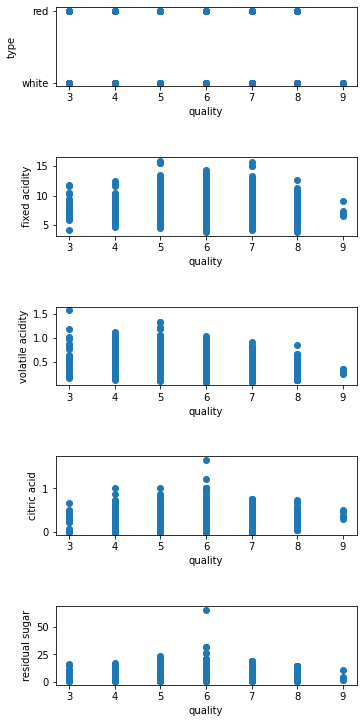

In [28]:
fig, axs = plt.subplots(5, 1)
fig.set_figwidth(5)
fig.set_figheight(10)
fig.tight_layout(h_pad = 5)

axs[0].scatter(df['quality'], df['type'])
axs[0].set_xlabel('quality')
axs[0].set_ylabel('type')

axs[1].scatter(df['quality'], df['fixed acidity'])
axs[1].set_xlabel('quality')
axs[1].set_ylabel('fixed acidity')

axs[2].scatter(df['quality'], df['volatile acidity'])
axs[2].set_xlabel('quality')
axs[2].set_ylabel('volatile acidity')

axs[3].scatter(df['quality'], df['citric acid'])
axs[3].set_xlabel('quality')
axs[3].set_ylabel('citric acid')

axs[4].scatter(df['quality'], df['residual sugar'])
axs[4].set_xlabel('quality')
axs[4].set_ylabel('residual sugar')


#### Of all wine types in dataset how is quality distributed?

main wine types are distributed between 5 and 7  qualities

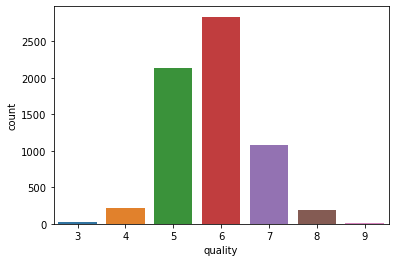

In [32]:
sns.countplot(x='quality', data=df);

Share of 6 quality is 43%

In [50]:
print(df[df['quality'] == 6].count()/len(df))

type                    0.436509
fixed acidity           0.435893
volatile acidity        0.435893
citric acid             0.436201
residual sugar          0.436355
chlorides               0.436355
free sulfur dioxide     0.436509
total sulfur dioxide    0.436509
density                 0.436509
pH                      0.435893
sulphates               0.436201
alcohol                 0.436509
quality                 0.436509
dtype: float64


### Check the correlation between quality and wine types

In [52]:
df.groupby(['quality', 'type'])['quality'].count()

quality  type 
3        red        10
         white      20
4        red        53
         white     163
5        red       681
         white    1457
6        red       638
         white    2198
7        red       199
         white     880
8        red        18
         white     175
9        white       5
Name: quality, dtype: int64

share of white wines is 75%

In [70]:
df['type'].describe()

count      6497
unique        2
top       white
freq       4898
Name: type, dtype: object

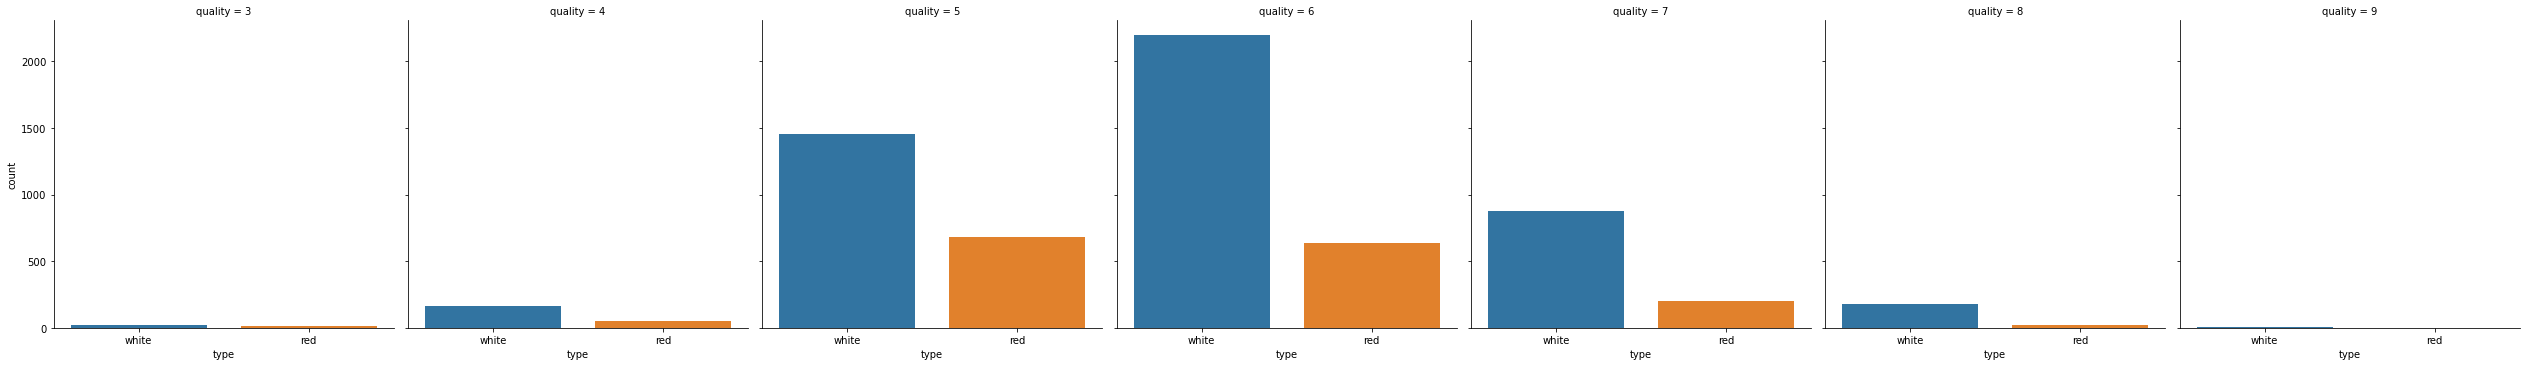

In [62]:
sns.catplot(x='type', col='quality', kind='count', data=df);
# share of white wine types is quite higher than red wine types

In [79]:
m_white = df[df['type']=='white']['quality'].mean() 
# the same result: df.loc[(df['type']=='white'), 'quality'].mean() 
m_red = df[df['type']=='red']['quality'].mean()
print(f"Mean of white wine type's quality is: {m_white}")
print(f"Mean of red wine type's quality is: {m_red}")

Mean of white wine type's quality is: 5.87790935075541
Mean of red wine type's quality is: 5.6360225140712945


#### It seems quality of white wines is higher than red

In [80]:
pd.crosstab(df.type, df.quality, margins=True).style.background_gradient(cmap='autumn_r')

quality,3,4,5,6,7,8,9,All
type,,,,,,,,
red,10,53,681,638,199,18,0,1599
white,20,163,1457,2198,880,175,5,4898
All,30,216,2138,2836,1079,193,5,6497


C:\Users\levon_y\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


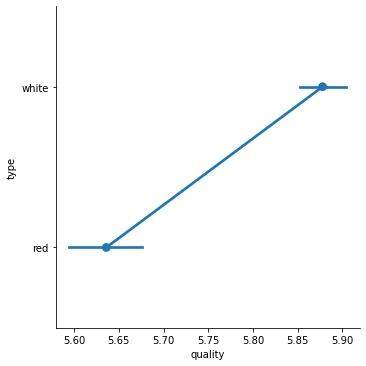

In [81]:
sns.catplot('quality', 'type', kind='point', data=df);

### difference of qualities between white and red wines is evident above